<a href="https://colab.research.google.com/github/MuhammadHamzaAfzal/Python_Class_Work_jz/blob/master/Deep_learning_Chp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imbd DataSet/ Text Processing

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [2]:
 train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
import numpy as np

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
print(len(x_train[0]))

10000


In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Validating

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 190us/sample - loss: 0.4896 - acc: 0.7719 - val_loss: 0.3481 - val_acc: 0.8679
Epoch 2/20
15000/15000 [==============================] - 2s 157us/sample - loss: 0.2692 - acc: 0.9033 - val_loss: 0.2768 - val_acc: 0.8914
Epoch 3/20
15000/15000 [==============================] - 2s 159us/sample - loss: 0.1867 - acc: 0.9357 - val_loss: 0.3084 - val_acc: 0.8766
Epoch 4/20
15000/15000 [==============================] - 2s 160us/sample - loss: 0.1503 - acc: 0.9448 - val_loss: 0.2952 - val_acc: 0.8852
Epoch 5/20
15000/15000 [==============================] - 2s 161us/sample - loss: 0.1083 - acc: 0.9635 - val_loss: 0.4290 - val_acc: 0.8502
Epoch 6/20
15000/15000 [==============================] - 2s 160us/sample - loss: 0.0892 - acc: 0.9703 - val_loss: 0.3364 - val_acc: 0.8824
Epoch 7/20
15000/15000 [==============================] - 2s 159us/sample - loss: 0.0627 - acc: 0.9806 - val_l

In [22]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

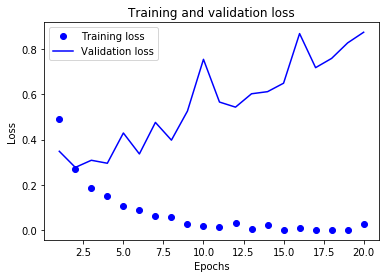

In [24]:
import matplotlib.pyplot as plt
#history_dict = history.history
acc=history_dict["acc"]
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

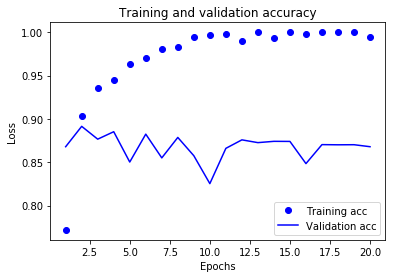

In [25]:
plt.clf()
acc_values = history_dict['acc']
val_acc=history_dict["val_acc"]
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)


Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 87us/sample - loss: 0.4622 - acc: 0.8327
Epoch 2/4
25000/25000 [==============================] - 2s 82us/sample - loss: 0.2674 - acc: 0.9081
Epoch 3/4
25000/25000 [==============================] - 2s 82us/sample - loss: 0.2040 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 2s 83us/sample - loss: 0.1684 - acc: 0.9411


In [29]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 75us/sample - loss: 0.2953 - acc: 0.8834


In [30]:
model.predict(x_test)

array([[0.20646158],
       [0.99992347],
       [0.9823727 ],
       ...,
       [0.13555208],
       [0.08013636],
       [0.60732913]], dtype=float32)

# #Reuters DataSet

In [31]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [32]:
len(train_data)

8982

In [33]:
len(test_data)

2246

In [34]:
 train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [35]:
train_labels[10]


3

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [47]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 252us/step - loss: 2.4982 - acc: 0.5343 - val_loss: 1.6560 - val_acc: 0.6560
Epoch 2/20
7982/7982 [==============================] - 1s 165us/step - loss: 1.3692 - acc: 0.7179 - val_loss: 1.2753 - val_acc: 0.7290
Epoch 3/20
7982/7982 [==============================] - 1s 169us/step - loss: 1.0361 - acc: 0.7793 - val_loss: 1.1157 - val_acc: 0.7570
Epoch 4/20
7982/7982 [==============================] - 1s 165us/step - loss: 0.8235 - acc: 0.8195 - val_loss: 1.0261 - val_acc: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 167us/step - loss: 0.6511 - acc: 0.8608 - val_loss: 1.0316 - val_acc: 0.7710
Epoch 6/20
7982/7982 [==============================] - 1s 164us/step - loss: 0.5226 - acc: 0.8896 - val_loss: 0.9307 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.4139 - acc: 0.9134 - val_loss: 0.8908 - val_acc: 0.8090


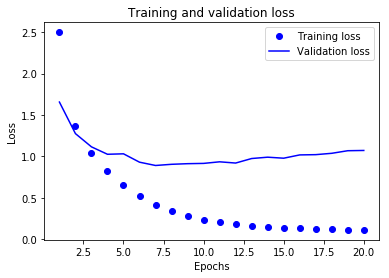

In [48]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

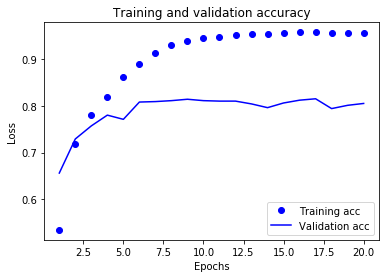

In [49]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 208us/step - loss: 2.7181 - acc: 0.4999 - val_loss: 1.7895 - val_acc: 0.6370
Epoch 2/9
7982/7982 [==============================] - 1s 168us/step - loss: 1.4425 - acc: 0.7030 - val_loss: 1.2787 - val_acc: 0.7270
Epoch 3/9
7982/7982 [==============================] - 1s 164us/step - loss: 1.0419 - acc: 0.7835 - val_loss: 1.1255 - val_acc: 0.7550
Epoch 4/9
7982/7982 [==============================] - 1s 165us/step - loss: 0.8163 - acc: 0.8266 - val_loss: 1.0058 - val_acc: 0.7910
Epoch 5/9
7982/7982 [==============================] - 1s 164us/step - loss: 0.6421 - acc: 0.8643 - val_loss: 0.9549 - val_acc: 0.7960
Epoch 6/9
7982/7982 [==============================] - 1s 167us/step - loss: 0.5150 - acc: 0.8938 - val_loss: 0.9010 - val_acc: 0.8070
Epoch 7/9
7982/7982 [==============================] - 1s 165us/step - loss: 0.4130 - acc: 0.9113 - val_loss: 0.8964 - val_acc: 0.8090
Epoch 8

In [51]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 98us/step


In [52]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1918967052537845

In [0]:
predictions = model.predict(x_test)

In [54]:
predictions[0].shape

(46,)

In [55]:
np.sum(predictions[0])

1.0000001

In [56]:
np.argmax(predictions[0])

3

In [0]:
y_train = np.array(train_labels)

In [0]:
y_test = np.array(test_labels)